In [1]:
"""
The classic game of flappy bird. Make with python
and pygame. Features pixel perfect collision using masks :o
Date Modified:  Jul 30, 2019
Author: Tech With Tim
Estimated Work Time: 5 hours (1 just for that damn collision)
"""
import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import torch.nn as nn
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm

if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
cuda:0


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
global target_order
target_order = "supervised"
global temp_list
temp_list = []
Agent_number_n=5;
Alpha = (1-0.600);

# torch.manual_seed(1)    # reproducible
# np.random.seed(1)

# Hyper Parameters
BATCH_SIZE = 64
LR_G = 0.00001           # learning rate for generator
N_IDEAS = Agent_number_n             # think of this as number of ideas for generating an art work (Generator)
ART_COMPONENTS = Agent_number_n     # it could be total point G can draw in the canvas
PAINT_POINTS = np.vstack([np.linspace(-1, 1, ART_COMPONENTS) for _ in range(BATCH_SIZE)])


GeneratorNet = nn.Sequential(                      # Generator
    # random ideas (could from normal distribution)
    nn.Linear(N_IDEAS, 128),
    nn.ReLU(),
    # making a painting from these random ideas
    nn.Linear(128, ART_COMPONENTS),
)
#GeneratorNet = torch.load("save/GeneratorNet_4_1") 

In [3]:
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(100000):
        appen_train(np.random.rand(Agent_number_n));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
#     devided=20
#     for i1 in range(devided+1):
#         for i2 in range(i1+1):
#             for i3 in range(i2+1):
#                 appen_test(i1/devided,i2/devided,i3/devided);
    for i in range(100000):
        appen_test(np.random.rand(Agent_number_n));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[0.58060267 0.57221333 0.18012114 0.7845112 ]
  [0.00537965 0.57221333 0.18012114 0.7845112 ]
  [0.00537965 0.58060267 0.18012114 0.7845112 ]
  [0.00537965 0.58060267 0.57221333 0.7845112 ]
  [0.00537965 0.58060267 0.57221333 0.18012114]]

 [[0.60756046 0.1871583  0.80068239 0.39975103]
  [0.55265641 0.1871583  0.80068239 0.39975103]
  [0.55265641 0.60756046 0.80068239 0.39975103]
  [0.55265641 0.60756046 0.1871583  0.39975103]
  [0.55265641 0.60756046 0.1871583  0.80068239]]

 [[0.28751546 0.1919809  0.49328706 0.85734985]
  [0.55225789 0.1919809  0.49328706 0.85734985]
  [0.55225789 0.28751546 0.49328706 0.85734985]
  [0.55225789 0.28751546 0.1919809  0.85734985]
  [0.55225789 0.28751546 0.1919809  0.49328706]]

 ...

 [[0.56264859 0.07322008 0.66993856 0.07264674]
  [0.78084263 0.07322008 0.66993856 0.07264674]
  [0.78084263 0.56264859 0.66993856 0.07264674]
  [0.78084263 0.56264859 0.07322008 0.07264674]
  [0.78084263 0.56264859 0.07322008 0.66993856]]

 [[0.89923635 0.83069784 0

In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list))

4.394838093666877 3.9999999999999982 0.3948380936668787


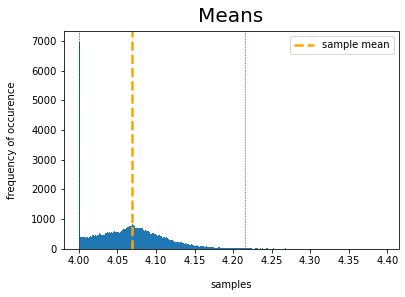

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
training_supervised_label=np.array(training_supervised_label)
print(training_supervised_label)

[[2.15226896 1.57887853 1.58866609 2.01247578 1.3613761 ]
 [2.03718759 1.98911664 2.36382312 1.80886951 2.17989927]
 [1.89226385 2.13290858 2.2157052  1.95153687 1.61490441]
 ...
 [1.39398467 1.63745398 2.13731851 1.51228234 2.13777718]
 [2.43678523 2.51786275 2.58640125 3.07113739 3.03527054]
 [1.26927289 1.12322672 2.06585907 1.92560341 1.98561707]]


In [7]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight, gain=nn.init.calculate_gain('relu'))
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight, gain=1.0)
        torch.nn.init.uniform_(m.bias, a=-1.0, b=1.0)
        

class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()

        num_input = Agent_number_n-1
        num_hidden = 100
        num_output = 1

        self.hidden_0 = torch.nn.Linear(num_input, num_hidden)
        self.hidden_1 = torch.nn.Linear(num_hidden, num_hidden)
        self.hidden_2 = torch.nn.Linear(num_hidden, num_hidden)
        self.hidden_3 = torch.nn.Linear(num_hidden, num_hidden)
        self.hidden_4 = torch.nn.Linear(num_hidden, num_hidden)
        self.hidden_5 = torch.nn.Linear(num_hidden, num_hidden)
        self.hidden_6 = torch.nn.Linear(num_hidden, num_hidden)
        self.hidden_7 = torch.nn.Linear(num_hidden, num_hidden)
        self.hidden_8 = torch.nn.Linear(num_hidden, num_hidden)
        self.output_allocation = torch.nn.Linear(num_hidden, num_output)

    def calculate(self, value_list):
        h1 = torch.relu(self.hidden_0(value_list))
        h2 = torch.relu(self.hidden_1(h1))
        h3 = torch.relu(self.hidden_2(h2))
        h4 = torch.relu(self.hidden_3(h3))
        h5 = torch.relu(self.hidden_4(h4))
        h6 = torch.relu(self.hidden_5(h5))
        h7 = torch.relu(self.hidden_6(h6))
        h8 = torch.relu(self.hidden_7(h7))
        h9 = torch.relu(self.hidden_8(h8))
        h = torch.relu(self.output_allocation(h9))

        return h

    def forward(self, input_list,input_label,label):
        global iteration,echo,target_order
        loss1 = 0
        loss2 = 0
        h_list = []

        if (target_order == "supervised"):
            loss = 0 
            for i in range(Agent_number_n):
                h = self.calculate(input_list[i])
                loss += torch.square(h - label[i])
                h_list.append(h)
            return loss
        else:
            for i in range(Agent_number_n):
                h = self.calculate(input_list[i])
                h_list.append(h)
                
            sum_h = torch.sum(torch.cat(h_list)).cuda()


            loss1 = torch.where((Agent_number_n-1)*input_label>sum_h,
                            torch.square((Agent_number_n-1)*input_label-sum_h)*1000,
                            torch.zeros(1).cuda()
                          )

            loss2 = torch.where((Agent_number_n-Alpha)*input_label<sum_h,
                            torch.square(sum_h-(Agent_number_n-Alpha)*input_label)*1000,
                            torch.zeros(1).cuda()
                          )

            return loss1,loss2,h_list

In [8]:
def redistribution_value_function(input_tensor):
    S = torch.max(torch.sum(input_tensor), torch.ones(1))
    temp_list = []


    for i in range(Agent_number_n):
        temp = []
        
        for j in range(Agent_number_n):
            if(i != j):
                temp .append(input_tensor[j])
                
        temp = torch.stack(temp)
        temp_list.append(temp)
    return torch.stack(temp_list), S

def Generator(GeneratorNet,DiscriminatorNet):

    opt_G = torch.optim.Adam(GeneratorNet.parameters(), lr=LR_G)


    DiscriminatorNet.requires_grad = False

    show_list = []
    for step in range(51):
        # real painting from artist
        G_ideas = torch.randn(BATCH_SIZE, N_IDEAS,
                              requires_grad=True)  # random ideas\n
        # fake painting from G (random ideas)
        G_values = GeneratorNet(G_ideas)
    #     print(artist_paintings)
    #     print(G_paintings)

        result_list = []
        for index in range(BATCH_SIZE):
            h_list = []
            value_list_tensor, S_tensor = redistribution_value_function(
                G_values[index])
            for i in range(Agent_number_n):
                h = DiscriminatorNet.calculate(
                    value_list_tensor[i].cuda().type(torch.float32))
                h_list.append(h)
            h_list = torch.stack(h_list)
            result_list.append(torch.sum(h_list)/S_tensor.cuda())
            show_list.append(float(torch.sum(h_list)/S_tensor.cuda()))
        result_list = torch.stack(result_list)

        diff_loss = torch.max(result_list)-torch.min(result_list)
        G_loss = torch.max(- diff_loss)

        opt_G.zero_grad()
        G_loss.backward()
        opt_G.step()

        if step % 50 == 0 and step != 0:  # plotting


            print(max(show_list), min(show_list),
                  max(show_list)-min(show_list))

            plt.hist(show_list, bins=500)

            plt.title("Means", y=1.015, fontsize=20)
            plt.axvline(x=sum(show_list)/len(show_list), linestyle='--',
                        linewidth=2.5, label="sample mean", c='orange')
            plt.xlabel("samples", labelpad=14)
            plt.ylabel("frequency of occurence", labelpad=14)
            plt.legend()

            show_list.sort()
            show_list = []
            plt.show()
    torch.save(GeneratorNet , "save/GeneratorNet_5") 
    
    DiscriminatorNet.requires_grad = True
    return GeneratorNet

In [9]:
random.seed(2000)
torch.manual_seed(256)
net  = Net()
net.apply(weight_init)

net = torch.load("save/Deep_learning_5")
net.to(dev)

Net(
  (hidden_0): Linear(in_features=4, out_features=100, bias=True)
  (hidden_1): Linear(in_features=100, out_features=100, bias=True)
  (hidden_2): Linear(in_features=100, out_features=100, bias=True)
  (hidden_3): Linear(in_features=100, out_features=100, bias=True)
  (hidden_4): Linear(in_features=100, out_features=100, bias=True)
  (hidden_5): Linear(in_features=100, out_features=100, bias=True)
  (hidden_6): Linear(in_features=100, out_features=100, bias=True)
  (hidden_7): Linear(in_features=100, out_features=100, bias=True)
  (hidden_8): Linear(in_features=100, out_features=100, bias=True)
  (output_allocation): Linear(in_features=100, out_features=1, bias=True)
)

In [10]:
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00001)
optimizer = opt.Adam(net.parameters(), lr=0.00005)

batch_size = 64
echo = 2

In [11]:
target_order = "supervised"
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []
    
    
    X_train_list = []
    temp_number = 0
    total_batch_loss = 0 
    while(temp_number<len(training_data)-1):
        loss_sum = 0
        denominator = 0
        for index in range(temp_number, min(batch_size+temp_number,len(training_data))):
            h_loss = net(torch.from_numpy(
            np.array(training_data[index])).cuda().type(torch.float32),training_label[index],training_supervised_label[index])
            denominator += 1
            loss_sum += h_loss
            
        loss = (loss_sum) / denominator 
        total_batch_loss +=float(loss_sum)
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        temp_number = index
        
        if(random.random()<=0.01):
            print(temp_number,loss,float(loss_sum))


    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))
    
    print()
    print()

3024 tensor([0.0004], device='cuda:0', grad_fn=<DivBackward0>) 0.022964008152484894
4347 tensor([0.0005], device='cuda:0', grad_fn=<DivBackward0>) 0.029437273740768433
8883 tensor([0.0004], device='cuda:0', grad_fn=<DivBackward0>) 0.026751825585961342
13104 tensor([0.0005], device='cuda:0', grad_fn=<DivBackward0>) 0.03279579430818558
16128 tensor([0.0005], device='cuda:0', grad_fn=<DivBackward0>) 0.03430723771452904
25011 tensor([0.0004], device='cuda:0', grad_fn=<DivBackward0>) 0.027812769636511803
35091 tensor([0.0004], device='cuda:0', grad_fn=<DivBackward0>) 0.028325295075774193
36351 tensor([0.0007], device='cuda:0', grad_fn=<DivBackward0>) 0.042176488786935806
36666 tensor([0.0006], device='cuda:0', grad_fn=<DivBackward0>) 0.037921324372291565
56007 tensor([0.0005], device='cuda:0', grad_fn=<DivBackward0>) 0.028819650411605835
68103 tensor([0.0004], device='cuda:0', grad_fn=<DivBackward0>) 0.02829173393547535
68166 tensor([0.0005], device='cuda:0', grad_fn=<DivBackward0>) 0.02955

In [12]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

4.452348589897156 3.9211137890815735 0.5312348008155823


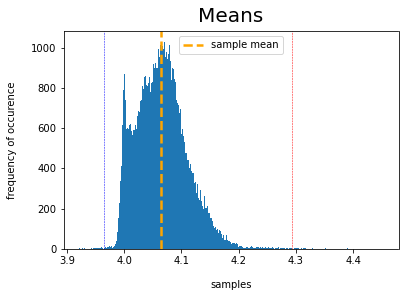

In [13]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.001)], linestyle='--', linewidth=0.5, label="0.1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.999)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [14]:
torch.save(net, "save/Deep_learning_5")

In [15]:
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00005)
optimizer = opt.Adam(net.parameters(), lr=0.000001)

batch_size = 64
echo = 1



4.580151557922363 3.5605621337890625 1.0195894241333008


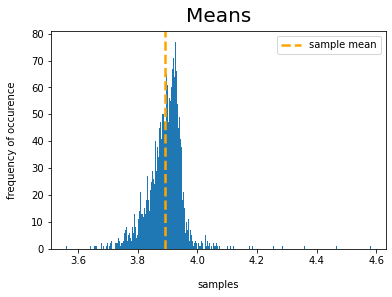

0 batch iteration 0
batch_loss: 0.10 


3339 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
11277 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
12033 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
12096 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
17010 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
35406 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
51723 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
53991 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
67788 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
93240 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
batch iteration 0
batch_loss: 0.00 




In [16]:
target_order = "unsupervised"
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []

    GeneratorNet = Generator(GeneratorNet, net)

    X_train_list = []
    total_batch_loss = 0
    for i in range(101):

        G_ideas = torch.randn(BATCH_SIZE, N_IDEAS,
                              requires_grad=True)
        G_values = GeneratorNet(G_ideas)

        loss1_sum = 0
        loss2_sum = 0

        for index in range(BATCH_SIZE):
            h_list = []
            value_list_tensor, S_tensor = redistribution_value_function(
                G_values[index])

            h_loss1, h_loss2, h_list = net(
                value_list_tensor.cuda().type(torch.float32), S_tensor.cuda(), 0)
            loss1_sum += h_loss1
            loss2_sum += h_loss2

        loss_sum = loss1_sum + loss2_sum
        loss = (loss_sum) / BATCH_SIZE
        total_batch_loss += float(loss_sum)
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if(random.random() <= 0.01):
            print(i, loss, float(loss1_sum), float(loss2_sum))

    print(iteration, "batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))

    print()
    print()

for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []

    X_train_list = []
    temp_number = 0
    total_batch_loss = 0
    while(temp_number < len(training_data)-1):

        loss2_list = []
        loss1_sum = 0
        loss2_sum = 0
        denominator = 0
        for index in range(temp_number, min(batch_size+temp_number, len(training_data))):
            h_loss1, h_loss2, h_list = net(
                torch.from_numpy(
                    np.array(
                        training_data[index])).cuda().type(torch.float32), training_label[index], 0)
            denominator += 1
            loss1_sum += h_loss1
            loss2_sum += h_loss2

        loss_sum = loss1_sum + loss2_sum
        loss = (loss_sum) / denominator
        total_batch_loss += float(loss_sum)
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        temp_number = index

        if(random.random() <= 0.01):
            print(temp_number, loss, float(loss1_sum), float(loss2_sum))

    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))

    print()
    print()

In [17]:
torch.save(net, "save/Deep_learning_5")

In [18]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

4.653043627738953 3.9637443564988297 0.6892992712401229


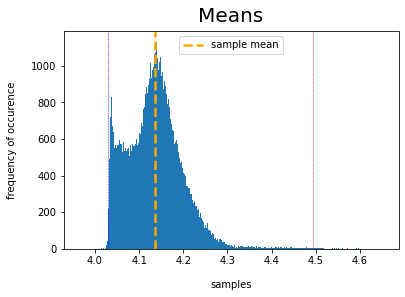

In [19]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.001)], linestyle='--', linewidth=0.5, label="0.1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.999)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()